In [1]:
!pip freeze


absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [4]:
df = pd.read_excel('data.xlsx')

df.head()

,Date,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),turbidity
0,2020-12-31 15:00:00,4.0,78,9.8,0.391,55,0.430411
1,2020-12-31 16:00:00,3.4,85,5.6,0.391,25,0.522836
2,2020-12-31 17:00:00,1.5,94,7.3,0.390,3,0.512069
3,2020-12-31 18:00:00,0.8,95,7.1,0.389,0,0.450545
4,2020-12-31 19:00:00,-0.1,97,8.4,0.388,0,0.405494


In [5]:
df['relative_humidity_2m (%)_lag3'] = df['relative_humidity_2m (%)'].shift(3)
df['wind_speed_10m(km/h)_lag6'] = df['wind_speed_10m (km/h)'].shift(6)
df['soil_moisture_0_to_7cm_lag72'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(72)
df['direct_radiation (W/m²)_lag72'] = df['direct_radiation (W/m²)'].shift(72)
df = df.dropna()


In [6]:
# Change the time series variable name
df = df.rename(columns={'Date': 'ds', 'turbidity': 'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d %H:%M:%S')

df.head()

,ds,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,17.2,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,16.1,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,14.5,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,14.9,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,16.5,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26179 entries, 72 to 26250
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ds                              26179 non-null  datetime64[ns]
 1   temperature_2m (°C)             26179 non-null  float64       
 2   relative_humidity_2m (%)        26179 non-null  int64         
 3   wind_speed_10m (km/h)           26179 non-null  float64       
 4   soil_moisture_0_to_7cm (m³/m³)  26179 non-null  float64       
 5   direct_radiation (W/m²)         26179 non-null  int64         
 6   y                               26179 non-null  float64       
 7   relative_humidity_2m (%)_lag3   26179 non-null  float64       
 8   wind_speed_10m(km/h)_lag6       26179 non-null  float64       
 9   soil_moisture_0_to_7cm_lag72    26179 non-null  float64       
 10  direct_radiation (W/m²)_lag72   26179 non-null  float64       
dtypes: dat

In [8]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [9]:
# save the train and test sets to CSV files
train.to_csv('train.csv')
test.to_csv('test.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20943 entries, 72 to 21014
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ds                              20943 non-null  datetime64[ns]
 1   temperature_2m (°C)             20943 non-null  float64       
 2   relative_humidity_2m (%)        20943 non-null  int64         
 3   wind_speed_10m (km/h)           20943 non-null  float64       
 4   soil_moisture_0_to_7cm (m³/m³)  20943 non-null  float64       
 5   direct_radiation (W/m²)         20943 non-null  int64         
 6   y                               20943 non-null  float64       
 7   relative_humidity_2m (%)_lag3   20943 non-null  float64       
 8   wind_speed_10m(km/h)_lag6       20943 non-null  float64       
 9   soil_moisture_0_to_7cm_lag72    20943 non-null  float64       
 10  direct_radiation (W/m²)_lag72   20943 non-null  float64       
dtypes: dat

In [11]:
train.head()

,ds,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,17.2,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,16.1,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,14.5,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,14.9,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,16.5,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [12]:
# Drop variables that are not needed
# df.drop(columns = ['column1', 'column2'])


# Exploratory Data Analysis

In [13]:
# create a copy of the df with index
train_index = train.copy()
train_index.set_index('ds', inplace=True)


In [14]:
# set the frequency of the df index to hourly('h')
train_index.index.freq = 'h'
train_index.index

DatetimeIndex(['2021-01-03 15:00:00', '2021-01-03 16:00:00',
               '2021-01-03 17:00:00', '2021-01-03 18:00:00',
               '2021-01-03 19:00:00', '2021-01-03 20:00:00',
               '2021-01-03 21:00:00', '2021-01-03 22:00:00',
               '2021-01-03 23:00:00', '2021-01-04 00:00:00',
               ...
               '2023-05-25 20:00:00', '2023-05-25 21:00:00',
               '2023-05-25 22:00:00', '2023-05-25 23:00:00',
               '2023-05-26 00:00:00', '2023-05-26 01:00:00',
               '2023-05-26 02:00:00', '2023-05-26 03:00:00',
               '2023-05-26 04:00:00', '2023-05-26 05:00:00'],
              dtype='datetime64[ns]', name='ds', length=20943, freq='h')

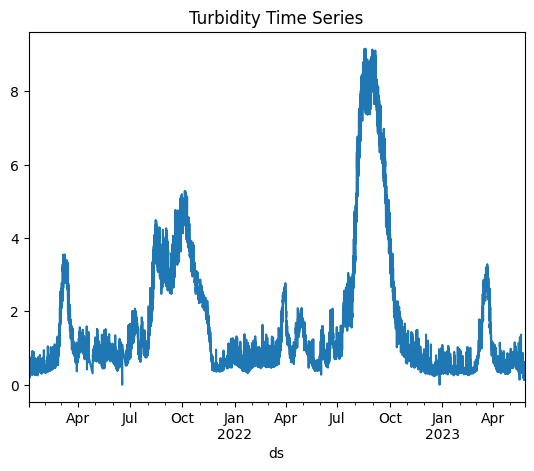

In [15]:
# PLot
train_index['y'].plot(title='Turbidity Time Series')
plt.show()

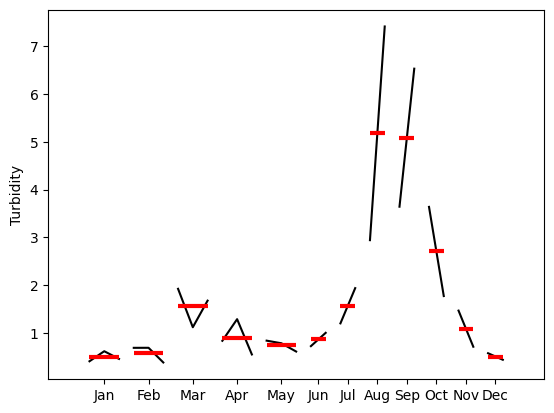

In [16]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

month_plot(train_index['y'].resample('ME').mean(),
           ylabel = 'Turbidity')
plt.show()

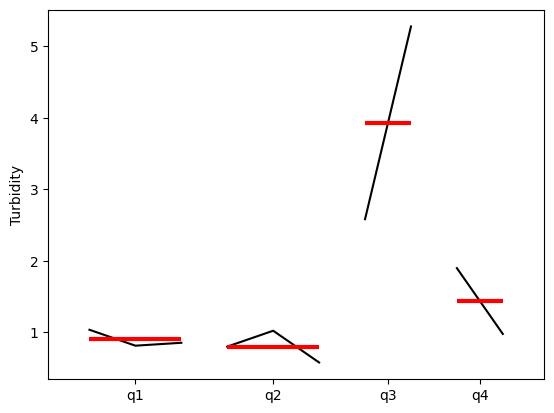

In [17]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

quarter_plot(train_index['y'].resample('QE').mean(),
           ylabel = 'Turbidity')
plt.show()

# Feature Engineering

# Creating lagged values for the regressors
for lag in [1, 3, 6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288]:
    df[f'temperature_2m (°C)_lag_{lag}'] = df['temperature_2m (°C)'].shift(lag)
    df[f'relative_humidity_2m (%)_lag_{lag}'] = df['relative_humidity_2m (%)'].shift(lag)
    df[f'precipitation (mm)_lag_{lag}'] = df['precipitation (mm)'].shift(lag)
    df[f'et0_fao_evapotranspiration (mm)_lag_{lag}'] = df['et0_fao_evapotranspiration (mm)'].shift(lag)
    df[f'wind_speed_10m (km/h)_lag_{lag}'] = df['wind_speed_10m (km/h)'].shift(lag)
    df[f'wind_gusts_10m (km/h)_lag_{lag}'] = df['wind_gusts_10m (km/h)'].shift(lag)
    df[f'soil_temperature_0_to_7cm (°C)_lag_{lag}'] = df['soil_temperature_0_to_7cm (°C)'].shift(lag)
    df[f'soil_moisture_0_to_7cm (m³/m³)_lag_{lag}'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(lag)
    df[f'direct_radiation (W/m²)_lag_{lag}'] = df['direct_radiation (W/m²)'].shift(lag)


df_train.head()

df_train.columns

# Correlation matrix between the non-lagged values, lagged values and y

columns = ['y'] + [
	f'{feature}_lag_{lag}'
	for feature in [
		'temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)', 'et0_fao_evapotranspiration (mm)', 'wind_speed_10m (km/h)', 'wind_gusts_10m (km/h)',
		'soil_temperature_0_to_7cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 'direct_radiation (W/m²)'
	]
	for lag in [1, 3, 6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288]
]

corr = df_train[columns].corr()
corr


# Display the correlation matrix between y and temperature_2m (°C)
corr_y_temp = corr.loc['y', 'temperature_2m (°C)_lag_1':'temperature_2m (°C)_lag_288']
corr_y_temp



# Display the correlation matrix between y and relative_humidity_2m (%)
corr_y_humidity = corr.loc['y', 'relative_humidity_2m (%)_lag_1':'relative_humidity_2m (%)_lag_288']
corr_y_humidity



# Display the correlation matrix between y and precipitation (mm)
corr_y_precipitation = corr.loc['y', 'precipitation (mm)_lag_1':'precipitation (mm)_lag_288']
corr_y_precipitation

# Display the correlation matrix between y and et0_fao_evapotranspiration (mm)
corr_y_et0 = corr.loc['y', 'et0_fao_evapotranspiration (mm)_lag_1':'et0_fao_evapotranspiration (mm)_lag_288']   
corr_y_et0

# Display the correlation matrix between y and wind_speed_10m (km/h)
corr_y_wind_speed = corr.loc['y', 'wind_speed_10m (km/h)_lag_1':'wind_speed_10m (km/h)_lag_288']
corr_y_wind_speed


# Display the correlation matrix between y and wind_gusts_10m (km/h)
corr_y_wind_gusts = corr.loc['y', 'wind_gusts_10m (km/h)_lag_1':'wind_gusts_10m (km/h)_lag_288']
corr_y_wind_gusts


# display the correlation matrix between y and soil_temperature_0_to_7cm (°C)
corr_y_soil_temp = corr.loc['y', 'soil_temperature_0_to_7cm (°C)_lag_1':'soil_temperature_0_to_7cm (°C)_lag_288']
corr_y_soil_temp


# display the correlation matrix between y and soil_moisture_0_to_7cm (m³/m³)
corr_y_soil_moisture = corr.loc['y', 'soil_moisture_0_to_7cm (m³/m³)_lag_1':'soil_moisture_0_to_7cm (m³/m³)_lag_288']   
corr_y_soil_moisture


# Display the correlation matrix between y and direct_radiation (W/m²)
corr_y_direct_radiation = corr.loc['y', 'direct_radiation (W/m²)_lag_1':'direct_radiation (W/m²)_lag_288']
corr_y_direct_radiation


# Creating lagged values for the regressors
# df[f'temperature_2m (°C)_lag_{lag}'] = df['temperature_2m (°C)'].shift(3)
df[f'relative_humidity_2m (%)_lag_{lag}'] = df['relative_humidity_2m (%)'].shift(3)
df[f'wind_speed_10m (km/h)_lag_{lag}'] = df['wind_speed_10m (km/h)'].shift(12)
# df[f'wind_gusts_10m (km/h)_lag_{lag}'] = df['wind_gusts_10m (km/h)'].shift(168)
# df[f'soil_temperature_0_to_7cm (°C)_lag_{lag}'] = df['soil_temperature_0_to_7cm (°C)'].shift(72)
df[f'soil_moisture_0_to_7cm (m³/m³)_lag_{lag}'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(72)
df[f'direct_radiation (W/m²)_lag_{lag}'] = df['direct_radiation (W/m²)'].shift(72)


# Correlation matrix between the lagged values and y
columns = (
	['y'] +
	[
		'temperature_2m (°C)', 'relative_humidity_2m (%)', 'wind_speed_10m (km/h)',
		 'soil_moisture_0_to_7cm (m³/m³)', 'direct_radiation (W/m²)'
	] +
	[
		'relative_humidity_2m (%)_lag_3', 'wind_speed_10m (km/h)_lag_6',
		'soil_moisture_0_to_7cm (m³/m³)_lag_72', 'direct_radiation (W/m²)_lag_72'
	]
)

corr = df_train[columns].corr()
corr


In [18]:
# features: temperature, relative_humidity_3, wind_speed_6, soil_moisture_72, direct_radiation_72
# target: y (turbidity)

# Prophet model

In [19]:
# Look at df
train.head()

,ds,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,17.2,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,16.1,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,14.5,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,14.9,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,16.5,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [20]:
train = train[['ds', 'y', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'relative_humidity_2m (%)_lag3', 'wind_speed_10m (km/h)', 'wind_speed_10m(km/h)_lag6', 'soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_0_to_7cm_lag72', 'direct_radiation (W/m²)_lag72']]
train.head()

,ds,y,temperature_2m (°C),relative_humidity_2m (%),relative_humidity_2m (%)_lag3,wind_speed_10m (km/h),wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm (m³/m³),soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,0.367532,3.6,80,85.0,17.2,9.1,0.378,0.391,55.0
73,2021-01-03 16:00:00,0.439294,3.5,78,80.0,16.1,11.5,0.377,0.391,25.0
74,2021-01-03 17:00:00,0.445193,3.0,77,78.0,14.5,13.6,0.377,0.390,3.0
75,2021-01-03 18:00:00,0.371390,2.7,81,80.0,14.9,15.3,0.376,0.389,0.0
76,2021-01-03 19:00:00,0.366914,2.5,82,78.0,16.5,17.9,0.376,0.388,0.0


In [21]:
%pip install prophet
from prophet import Prophet

In [22]:
# Building the prophet model
m = Prophet(
   # daily_seasonality=False,
   # weekly_seasonality=False,
    yearly_seasonality=True,
   # monthly_seasonality=True,
    seasonality_mode='additive',
    seasonality_prior_scale=10,
    changepoint_prior_scale=0.05
)

# Add additional regressors (external factors) to the model
m.add_regressor('temperature_2m (°C)')
m.add_regressor('relative_humidity_2m (%)')
m.add_regressor('wind_speed_10m (km/h)')
m.add_regressor('soil_moisture_0_to_7cm (m³/m³)')
m.add_regressor('relative_humidity_2m (%)_lag3')
m.add_regressor('wind_speed_10m(km/h)_lag6')
m.add_regressor('soil_moisture_0_to_7cm_lag72')
m.add_regressor('direct_radiation (W/m²)_lag72')


# fit the model to the train data
m.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/92r_tbvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/grz1ds7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79002', 'data', 'file=/tmp/tmp_och8k2d/92r_tbvw.json', 'init=/tmp/tmp_och8k2d/grz1ds7s.json', 'output', 'file=/tmp/tmp_och8k2d/prophet_modell_xynvs6/prophet_model-20250504170952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Regressor Coefficients

In [23]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)


,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,temperature_2m (°C),additive,10.746698,0.003024,0.003024,0.003024
1,relative_humidity_2m (%),additive,78.052715,0.001536,0.001536,0.001536
2,wind_speed_10m (km/h),additive,13.724901,0.003071,0.003071,0.003071
3,soil_moisture_0_to_7cm (m³/m³),additive,0.320401,-0.130306,-0.130306,-0.130306
4,relative_humidity_2m (%)_lag3,additive,78.052142,-0.003037,-0.003037,-0.003037
5,wind_speed_10m(km/h)_lag6,additive,13.725068,0.000157,0.000157,0.000157
6,soil_moisture_0_to_7cm_lag72,additive,0.320853,-1.538668,-1.538668,-1.538668
7,direct_radiation (W/m²)_lag72,additive,75.214964,-0.000132,-0.000132,-0.000132


In [24]:
# Build a function to interpret the coefficients
def interpret_prophet_coeficients(df):

    interpretation = []
    for _, row in df.iterrows():
        regressor = row['regressor']
        mode = row['regressor_mode']
        coef = row['coef']
        effect_type = 'positive' if coef > 0 else 'negative' if coef < 0 else 'zero'

        if mode == 'multiplicative':
            interpretation.append(f"The {regressor} has a {effect_type} multiplicative effect on the target variable.")
        elif mode == 'additive':
            interpretation.append(f"The {regressor} has a {effect_type} additive effect on the target variable.")
        else:
            interpretation.append(f"The {regressor} has an unknown effect on the target variable.")


    return interpretation

coefs = pd.DataFrame(regressor_coefficients(m))
interpretation = interpret_prophet_coeficients(coefs)
for interpret in interpretation:
    print(interpret)


The temperature_2m (°C) has a positive additive effect on the target variable.
The relative_humidity_2m (%) has a positive additive effect on the target variable.
The wind_speed_10m (km/h) has a positive additive effect on the target variable.
The soil_moisture_0_to_7cm (m³/m³) has a negative additive effect on the target variable.
The relative_humidity_2m (%)_lag3 has a negative additive effect on the target variable.
The wind_speed_10m(km/h)_lag6 has a positive additive effect on the target variable.
The soil_moisture_0_to_7cm_lag72 has a negative additive effect on the target variable.
The direct_radiation (W/m²)_lag72 has a negative additive effect on the target variable.


# Cross-Validation

In [25]:
from prophet.diagnostics import cross_validation


In [26]:
# Apply the CV to the model
train_cv = cross_validation(model=m, period='720 hours', horizon='24 hours', initial='8760 hours', parallel='processes')

train_cv.head()


INFO:prophet:Making 17 forecasts with cutoffs between 2022-01-30 05:00:00 and 2023-05-25 05:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x783ba26375d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/oi1000g5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/i4ngty4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/lkwsgvg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/5xk4l9e0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/u2qunk0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/iomcfc7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/zrvw1pvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/1dt6f7d_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/j29cr8se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/o9okmnga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/ko4fgoqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/2gtl9maz.json
DEBUG:cmdstanpy:input tempfile: /

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-01-30 06:00:00,0.437191,0.104843,0.765240,0.472005,2022-01-30 05:00:00
1,2022-01-30 07:00:00,0.444046,0.101209,0.783240,0.557350,2022-01-30 05:00:00
2,2022-01-30 08:00:00,0.457243,0.144547,0.786104,0.616455,2022-01-30 05:00:00
3,2022-01-30 09:00:00,0.485190,0.150268,0.829082,0.637449,2022-01-30 05:00:00
4,2022-01-30 10:00:00,0.491588,0.152643,0.876224,0.614660,2022-01-30 05:00:00


In [27]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          408 non-null    datetime64[ns]
 1   yhat        408 non-null    float64       
 2   yhat_lower  408 non-null    float64       
 3   yhat_upper  408 non-null    float64       
 4   y           408 non-null    float64       
 5   cutoff      408 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 19.3 KB


In [28]:
# Performance metrics
from prophet.diagnostics import performance_metrics
performance_metrics(train_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.124597,0.352982,0.251740,0.336752,0.184812,0.260940,0.832353
1,0 days 04:00:00,0.150822,0.388358,0.270073,0.387162,0.221073,0.278885,0.823529
2,0 days 05:00:00,0.192625,0.438891,0.305899,0.381539,0.195367,0.285531,0.798529
3,0 days 06:00:00,0.217475,0.466342,0.341260,0.421470,0.199672,0.310929,0.723529
4,0 days 07:00:00,0.217278,0.466131,0.364821,0.445939,0.300167,0.343687,0.664706
5,0 days 08:00:00,0.215917,0.464669,0.375813,0.441768,0.296707,0.361377,0.647059
6,0 days 09:00:00,0.237714,0.487559,0.397283,0.434236,0.297546,0.372073,0.697059
7,0 days 10:00:00,0.271184,0.520753,0.410711,0.398180,0.353579,0.367307,0.747059
8,0 days 11:00:00,0.282955,0.531935,0.402126,0.349031,0.341078,0.354472,0.689706
9,0 days 12:00:00,0.276729,0.526050,0.387598,0.318237,0.274822,0.336593,0.689706


In [29]:
# RMSE and MAPE
rmse = round(performance_metrics(train_cv)['rmse'].mean(),0)
mape = round(performance_metrics(train_cv)['mape'].mean()*100,2)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 0.0
MAPE: 33.31


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


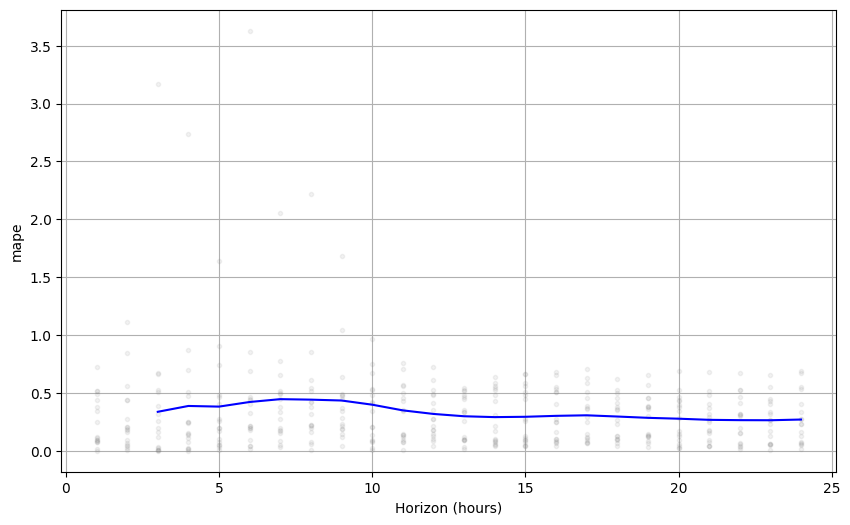

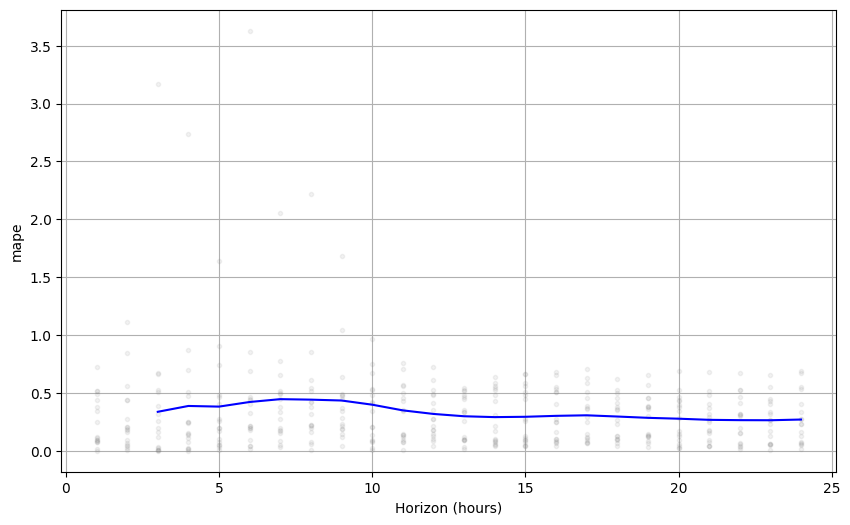

In [30]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(train_cv, metric='mape')



/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


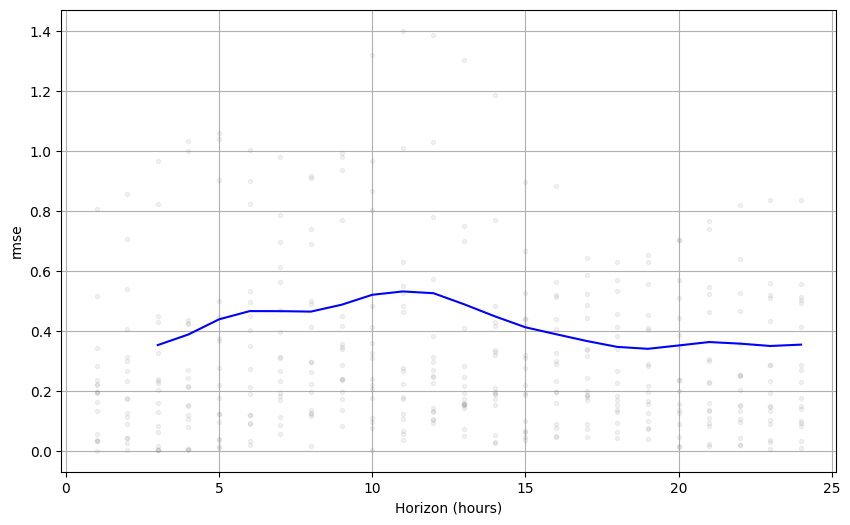

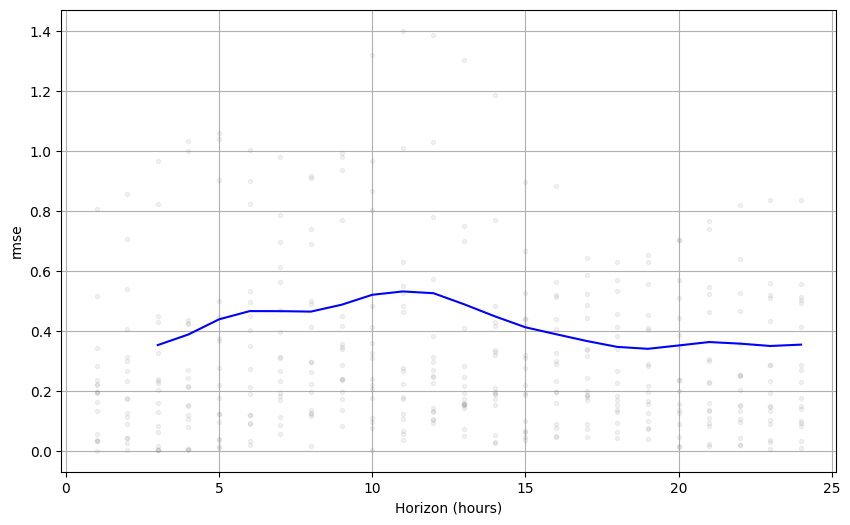

In [31]:
plot_cross_validation_metric(train_cv, metric='rmse')

# Explore the Error

In [32]:
# Compute the Error / deviation
train_cv['deviation'] = train_cv['yhat'] - train_cv['y']



In [33]:
# Hours with the highest deviation
train_cv.sort_values(by='deviation', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation
196,2022-09-27 10:00:00,5.130039,4.662753,5.660315,4.069559,2022-09-27 05:00:00,1.060480
340,2023-03-26 10:00:00,2.447629,1.946699,2.923938,1.407232,2023-03-26 05:00:00,1.040397
195,2022-09-27 09:00:00,5.126935,4.665196,5.601040,4.093887,2022-09-27 05:00:00,1.033048
347,2023-03-26 17:00:00,2.450323,1.962123,2.935882,1.421106,2023-03-26 05:00:00,1.029217
346,2023-03-26 16:00:00,2.442892,1.958328,2.946839,1.433377,2023-03-26 05:00:00,1.009515
341,2023-03-26 11:00:00,2.460504,1.956604,2.929642,1.456182,2023-03-26 05:00:00,1.004322
339,2023-03-26 09:00:00,2.424507,1.912119,2.933224,1.424929,2023-03-26 05:00:00,0.999578
200,2022-09-27 14:00:00,5.183256,4.691434,5.639616,4.203164,2022-09-27 05:00:00,0.980091
342,2023-03-26 12:00:00,2.471074,1.969912,2.997932,1.491247,2023-03-26 05:00:00,0.979827
338,2023-03-26 08:00:00,2.416476,1.870829,2.926277,1.447764,2023-03-26 05:00:00,0.968712


In [34]:
# Houres with the lowest deviation
train_cv.sort_values(by='deviation', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation
154,2022-07-29 16:00:00,2.570478,2.121952,3.013285,3.972258,2022-07-29 05:00:00,-1.401781
155,2022-07-29 17:00:00,2.554059,2.111187,2.999341,3.942074,2022-07-29 05:00:00,-1.388015
153,2022-07-29 15:00:00,2.569425,2.106988,3.061017,3.891822,2022-07-29 05:00:00,-1.322397
156,2022-07-29 18:00:00,2.574979,2.128314,3.021996,3.877553,2022-07-29 05:00:00,-1.302574
157,2022-07-29 19:00:00,2.605370,2.184757,3.074527,3.791258,2022-07-29 05:00:00,-1.185888
152,2022-07-29 14:00:00,2.552712,2.085138,2.986573,3.545521,2022-07-29 05:00:00,-0.992809
172,2022-08-28 10:00:00,7.963824,7.527305,8.459186,8.868325,2022-08-28 05:00:00,-0.904501
158,2022-07-29 20:00:00,2.613450,2.178046,3.061721,3.510293,2022-07-29 05:00:00,-0.896843
183,2022-08-28 21:00:00,7.982388,7.549017,8.449948,8.866281,2022-08-28 05:00:00,-0.883894
173,2022-08-28 11:00:00,7.951025,7.509284,8.413892,8.775846,2022-08-28 05:00:00,-0.824820


In [35]:
# Compute the Error / deviation
train_cv['deviation_%'] = ( train_cv['yhat'] / train_cv['y'] - 1 ) *100

In [36]:
# Hours with the highest deviation in percentage
train_cv.sort_values(by='deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
389,2023-05-25 11:00:00,0.632557,0.169135,1.064009,0.136613,2023-05-25 05:00:00,0.495944,363.027445
386,2023-05-25 08:00:00,0.564833,0.063018,1.033680,0.135513,2023-05-25 05:00:00,0.429320,316.810332
387,2023-05-25 09:00:00,0.577168,0.105940,1.045019,0.154532,2023-05-25 05:00:00,0.422636,273.493990
391,2023-05-25 13:00:00,0.726759,0.259510,1.225184,0.225934,2023-05-25 05:00:00,0.500826,221.669522
390,2023-05-25 12:00:00,0.697884,0.236981,1.182419,0.228651,2023-05-25 05:00:00,0.469234,205.218328
392,2023-05-25 14:00:00,0.717109,0.225518,1.187168,0.267168,2023-05-25 05:00:00,0.449941,168.411189
388,2023-05-25 10:00:00,0.605214,0.144524,1.043260,0.229242,2023-05-25 05:00:00,0.375971,164.005984
385,2023-05-25 07:00:00,0.567612,0.062278,1.023886,0.268902,2023-05-25 05:00:00,0.298710,111.084775
320,2023-02-24 14:00:00,0.678753,0.227548,1.110195,0.332755,2023-02-24 05:00:00,0.345998,103.980054
321,2023-02-24 15:00:00,0.664754,0.259845,1.116368,0.337577,2023-02-24 05:00:00,0.327177,96.919140


In [37]:
# Hours with the highest deviation in percentage
train_cv.sort_values(by='deviation_%', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
119,2022-05-31 05:00:00,0.232748,-0.130191,0.602699,0.746556,2022-05-30 05:00:00,-0.513807,-68.823698
379,2023-04-26 01:00:00,0.258487,-0.217231,0.710581,0.827201,2023-04-25 05:00:00,-0.568715,-68.751667
380,2023-04-26 02:00:00,0.244040,-0.213034,0.714560,0.765878,2023-04-25 05:00:00,-0.521838,-68.135943
381,2023-04-26 03:00:00,0.256250,-0.194577,0.685840,0.783284,2023-04-25 05:00:00,-0.527034,-67.285160
383,2023-04-26 05:00:00,0.242634,-0.212122,0.704019,0.734954,2023-04-25 05:00:00,-0.492320,-66.986505
110,2022-05-30 20:00:00,0.262954,-0.086898,0.621398,0.790668,2022-05-30 05:00:00,-0.527713,-66.742767
378,2023-04-26 00:00:00,0.294590,-0.156921,0.768596,0.850641,2023-04-25 05:00:00,-0.556050,-65.368410
382,2023-04-26 04:00:00,0.271535,-0.171724,0.736905,0.780580,2023-04-25 05:00:00,-0.509045,-65.213656
377,2023-04-25 23:00:00,0.328260,-0.127516,0.796893,0.861400,2023-04-25 05:00:00,-0.533140,-61.892276
376,2023-04-25 22:00:00,0.345884,-0.112441,0.762485,0.833057,2023-04-25 05:00:00,-0.487173,-58.480119


# Parameter Tuning

In [38]:
# Define the parameter grid to search
param_gird = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [10, 20, 30],
    'changepoint_prior_scale': [0.01, 0.05, 0.5, 1]
}



In [39]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_gird))
# Print the parameter grid
all_params

[{'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 30},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 30},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 30},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode'

In [40]:
# Placeholder for results
tuning_results = []
# Build a pipeline for the parameter tuning
for params in all_params:
    # Building the prophet model
    m = Prophet(
        yearly_seasonality=True,
        # monthly_seasonality=True,
        **params)


    # Add additional regressors (external factors) to the model
    m.add_regressor('temperature_2m (°C)')
    m.add_regressor('relative_humidity_2m (%)')
    m.add_regressor('wind_speed_10m (km/h)')
    m.add_regressor('soil_moisture_0_to_7cm (m³/m³)')
    m.add_regressor('relative_humidity_2m (%)_lag3')
    m.add_regressor('wind_speed_10m(km/h)_lag6')
    m.add_regressor('soil_moisture_0_to_7cm_lag72')
    m.add_regressor('direct_radiation (W/m²)_lag72')


    # fit the model to the train data
    m.fit(train)

    # Cross-validation
    train_cv = cross_validation(model=m, period='720 hours', horizon='24 hours', initial='8760 hours', parallel='processes')

    # Calculate RMSE and MAPE
    rmse = performance_metrics(train_cv)['rmse'].mean()
    mape = performance_metrics(train_cv)['mape'].mean()

    # Store the results
    tuning_results.append({
        'params': params,
        'rmse': rmse,
        'mape': mape
    })

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/2pxhpe5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/5iaew875.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84367', 'data', 'file=/tmp/tmp_och8k2d/2pxhpe5e.json', 'init=/tmp/tmp_och8k2d/5iaew875.json', 'output', 'file=/tmp/tmp_och8k2d/prophet_model28oy7_br/prophet_model-20250504171335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:14:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 17 forecasts with cutoffs between 2022-01-30 05:00:00 and 2023-05-25 05:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x783ba2b52cd0>
DEBUG:cmdstanpy:input tempfile:

In [51]:
tuning_results
# Show the results in a DataFrame
tuning_results_df = pd.DataFrame(tuning_results)
tuning_results_df.sort_values(by='rmse', ascending=True, inplace=True)
tuning_results_df
tuning_results = tuning_results_df['rmse']

In [52]:

# Parameter Tuning Outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.01,additive,10,0.808211
1,0.01,additive,20,0.812405
2,0.01,additive,30,0.804690
3,0.01,multiplicative,10,0.679101
4,0.01,multiplicative,20,0.691640
5,0.01,multiplicative,30,0.684777
6,0.05,additive,10,0.418840
7,0.05,additive,20,0.429472
8,0.05,additive,30,0.428843
9,0.05,multiplicative,10,0.595002


In [56]:


# Fetch the best parameters
best_params = all_params[tuning_results.idxmin()]

best_params



{'changepoint_prior_scale': 0.05,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10}

# Predict the future

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20943 entries, 72 to 21014
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ds                              20943 non-null  datetime64[ns]
 1   y                               20943 non-null  float64       
 2   temperature_2m (°C)             20943 non-null  float64       
 3   relative_humidity_2m (%)        20943 non-null  int64         
 4   relative_humidity_2m (%)_lag3   20943 non-null  float64       
 5   wind_speed_10m (km/h)           20943 non-null  float64       
 6   wind_speed_10m(km/h)_lag6       20943 non-null  float64       
 7   soil_moisture_0_to_7cm (m³/m³)  20943 non-null  float64       
 8   soil_moisture_0_to_7cm_lag72    20943 non-null  float64       
 9   direct_radiation (W/m²)_lag72   20943 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.8 MB


In [60]:
# Building the prophet model with best_params
m = Prophet(
      yearly_seasonality=True,
      # monthly_seasonality=True,
      **best_params)

m.add_regressor('temperature_2m (°C)')
m.add_regressor('relative_humidity_2m (%)')
m.add_regressor('wind_speed_10m (km/h)')
m.add_regressor('soil_moisture_0_to_7cm (m³/m³)')
m.add_regressor('relative_humidity_2m (%)_lag3')
m.add_regressor('wind_speed_10m(km/h)_lag6')
m.add_regressor('soil_moisture_0_to_7cm_lag72')
m.add_regressor('direct_radiation (W/m²)_lag72')

m.fit(train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/clg_2yx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_och8k2d/b7cbr5jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1808', 'data', 'file=/tmp/tmp_och8k2d/clg_2yx2.json', 'init=/tmp/tmp_och8k2d/b7cbr5jn.json', 'output', 'file=/tmp/tmp_och8k2d/prophet_modelwipqrusu/prophet_model-20250504185059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [61]:
test.columns

Index(['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'wind_speed_10m (km/h)', 'soil_moisture_0_to_7cm (m³/m³)',
       'direct_radiation (W/m²)', 'y', 'relative_humidity_2m (%)_lag3',
       'wind_speed_10m(km/h)_lag6', 'soil_moisture_0_to_7cm_lag72',
       'direct_radiation (W/m²)_lag72'],
      dtype='object')

In [62]:
# Remove any NAs
test = test.dropna()

In [63]:
test = test.rename(columns={'Date': 'ds', 'turbidity': 'y'})



# Forecasting

In [64]:
test

,ds,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
21015,2023-05-26 06:00:00,8.1,86,14.1,0.239,28,0.422402,83.0,16.6,0.261,0.0
21016,2023-05-26 07:00:00,9.1,82,17.3,0.239,127,0.307034,85.0,13.8,0.261,8.0
21017,2023-05-26 08:00:00,10.5,76,18.1,0.239,270,0.288146,87.0,13.2,0.261,9.0
21018,2023-05-26 09:00:00,12.1,69,17.7,0.238,420,0.280129,86.0,13.8,0.261,4.0
21019,2023-05-26 10:00:00,13.7,64,18.1,0.237,555,0.274884,82.0,13.2,0.260,226.0
...,...,...,...,...,...,...,...,...,...,...,...
26246,2023-12-30 05:00:00,6.9,90,21.5,0.399,0,0.455236,87.0,23.8,0.397,0.0
26247,2023-12-30 06:00:00,6.9,90,21.4,0.399,0,0.398240,88.0,21.1,0.404,0.0
26248,2023-12-30 07:00:00,6.7,91,19.0,0.398,0,0.413984,88.0,21.6,0.408,0.0
26249,2023-12-30 08:00:00,6.6,93,19.4,0.397,0,0.435343,90.0,22.9,0.409,0.0


In [66]:

# make predictions
future = m.make_future_dataframe(periods=len(test), freq='H')
future = future.merge(test, on='ds', how='left')
future = future[['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'relative_humidity_2m (%)_lag3', 'wind_speed_10m (km/h)', 'wind_speed_10m(km/h)_lag6', 'soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_0_to_7cm_lag72', 'direct_radiation (W/m²)_lag72']]
future = future.dropna()


future




/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds,temperature_2m (°C),relative_humidity_2m (%),relative_humidity_2m (%)_lag3,wind_speed_10m (km/h),wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm (m³/m³),soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
20943,2023-05-26 06:00:00,8.1,86.0,83.0,14.1,16.6,0.239,0.261,0.0
20944,2023-05-26 07:00:00,9.1,82.0,85.0,17.3,13.8,0.239,0.261,8.0
20945,2023-05-26 08:00:00,10.5,76.0,87.0,18.1,13.2,0.239,0.261,9.0
20946,2023-05-26 09:00:00,12.1,69.0,86.0,17.7,13.8,0.238,0.261,4.0
20947,2023-05-26 10:00:00,13.7,64.0,82.0,18.1,13.2,0.237,0.260,226.0
...,...,...,...,...,...,...,...,...,...
26174,2023-12-30 05:00:00,6.9,90.0,87.0,21.5,23.8,0.399,0.397,0.0
26175,2023-12-30 06:00:00,6.9,90.0,88.0,21.4,21.1,0.399,0.404,0.0
26176,2023-12-30 07:00:00,6.7,91.0,88.0,19.0,21.6,0.398,0.408,0.0
26177,2023-12-30 08:00:00,6.6,93.0,90.0,19.4,22.9,0.397,0.409,0.0


In [67]:
future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5236 entries, 20943 to 26178
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ds                              5236 non-null   datetime64[ns]
 1   temperature_2m (°C)             5236 non-null   float64       
 2   relative_humidity_2m (%)        5236 non-null   float64       
 3   relative_humidity_2m (%)_lag3   5236 non-null   float64       
 4   wind_speed_10m (km/h)           5236 non-null   float64       
 5   wind_speed_10m(km/h)_lag6       5236 non-null   float64       
 6   soil_moisture_0_to_7cm (m³/m³)  5236 non-null   float64       
 7   soil_moisture_0_to_7cm_lag72    5236 non-null   float64       
 8   direct_radiation (W/m²)_lag72   5236 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 409.1 KB


In [68]:
# Make the predictions
forecast = m.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,wind_speed_10m(km/h)_lag6,wind_speed_10m(km/h)_lag6_lower,wind_speed_10m(km/h)_lag6_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5231,2023-12-30 05:00:00,1.172102,-24.859060,26.732224,-23.932400,27.564496,-0.944432,-0.944432,-0.944432,-0.040542,...,0.001582,0.001582,0.001582,-0.763698,-0.763698,-0.763698,0.0,0.0,0.0,0.227670
5232,2023-12-30 06:00:00,1.172072,-25.034887,26.720749,-23.938843,27.573905,-0.954931,-0.954931,-0.954931,-0.035897,...,0.001158,0.001158,0.001158,-0.763658,-0.763658,-0.763658,0.0,0.0,0.0,0.217141
5233,2023-12-30 07:00:00,1.172042,-25.248962,26.612795,-23.945287,27.583314,-0.954957,-0.954957,-0.954957,-0.022939,...,0.001236,0.001236,0.001236,-0.763619,-0.763619,-0.763619,0.0,0.0,0.0,0.217085
5234,2023-12-30 08:00:00,1.172012,-24.705936,26.649834,-23.951731,27.592723,-0.939350,-0.939350,-0.939350,-0.003465,...,0.001440,0.001440,0.001440,-0.763582,-0.763582,-0.763582,0.0,0.0,0.0,0.232662
5235,2023-12-30 09:00:00,1.171983,-24.889414,26.891892,-23.958174,27.602131,-0.919955,-0.919955,-0.919955,0.016779,...,0.001158,0.001158,0.001158,-0.763546,-0.763546,-0.763546,0.0,0.0,0.0,0.252028


In [69]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ds                                    5236 non-null   datetime64[ns]
 1   trend                                 5236 non-null   float64       
 2   yhat_lower                            5236 non-null   float64       
 3   yhat_upper                            5236 non-null   float64       
 4   trend_lower                           5236 non-null   float64       
 5   trend_upper                           5236 non-null   float64       
 6   additive_terms                        5236 non-null   float64       
 7   additive_terms_lower                  5236 non-null   float64       
 8   additive_terms_upper                  5236 non-null   float64       
 9   daily                                 5236 non-null   float64       
 10  

# Data Visualization

<Axes: >

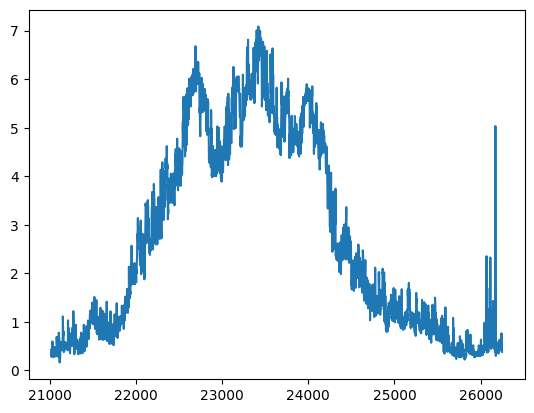

In [70]:
test['y'].plot()

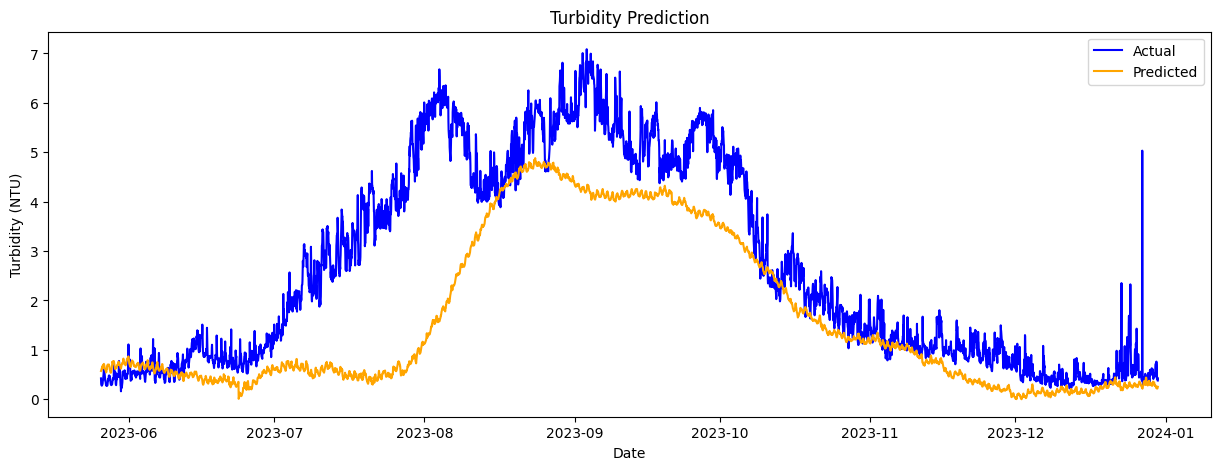

In [73]:
# Visualize time series plot
plt.figure(figsize=(15, 5))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
# plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Turbidity Prediction')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()


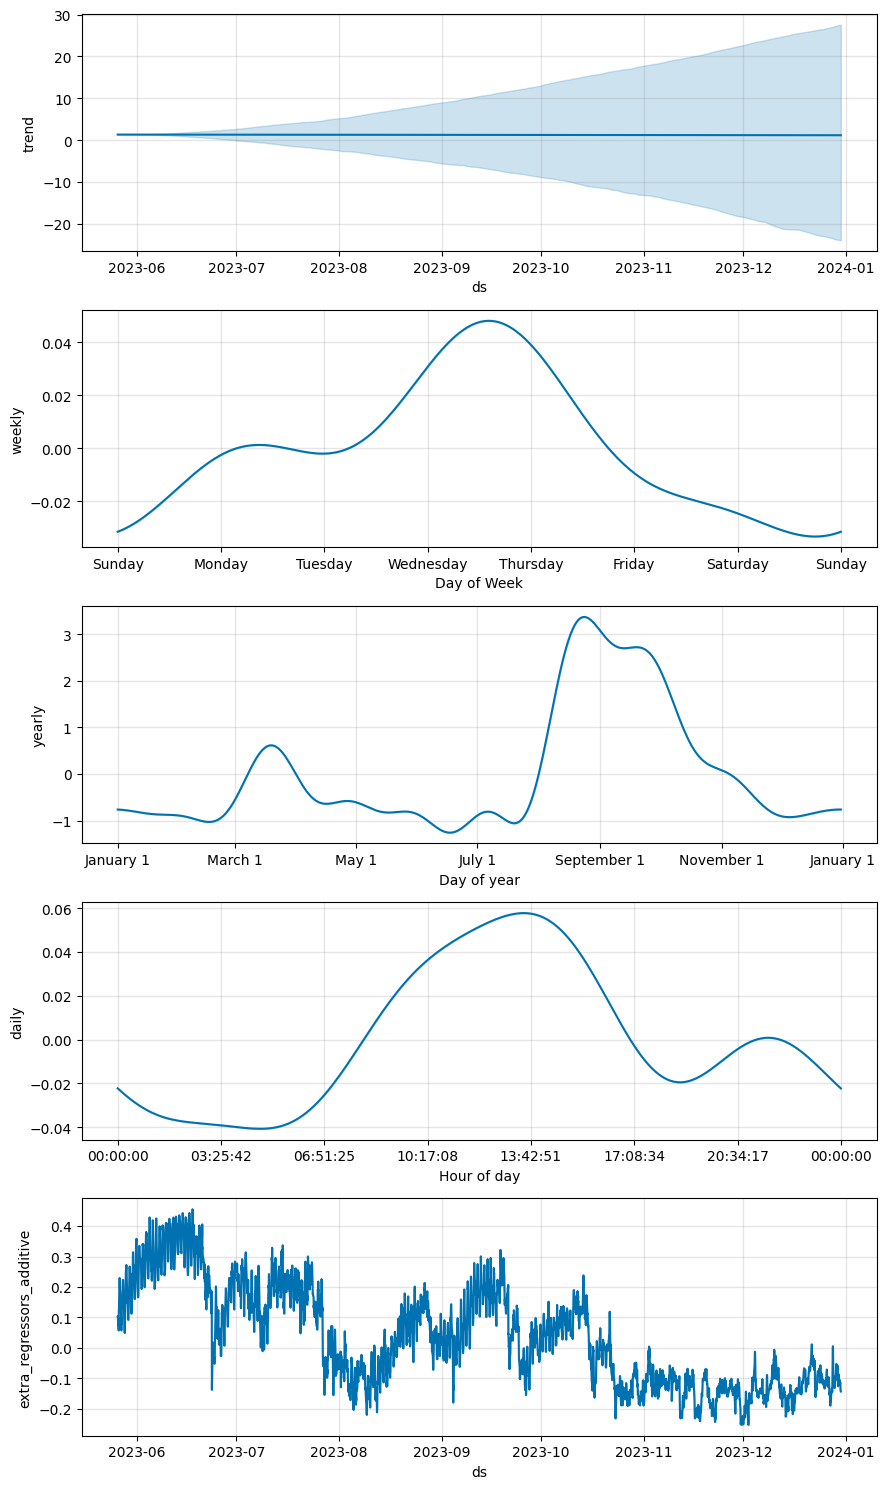

In [74]:
# Visualize components plot
m.plot_components(forecast)
plt.show()

# Evaluation Metrics

In [76]:
# calculate the metrcis on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import numpy as np
mape = mean_absolute_percentage_error(test['y'], forecast['yhat'])

mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], forecast['yhat'])
r2 = r2_score(test['y'], forecast['yhat'])
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")


MSE: 2.31547860894564
RMSE: 1.5216696780003338
MAE: 1.040230685629085
R2: 0.4405102866174717
MAPE: 0.4274087005240269


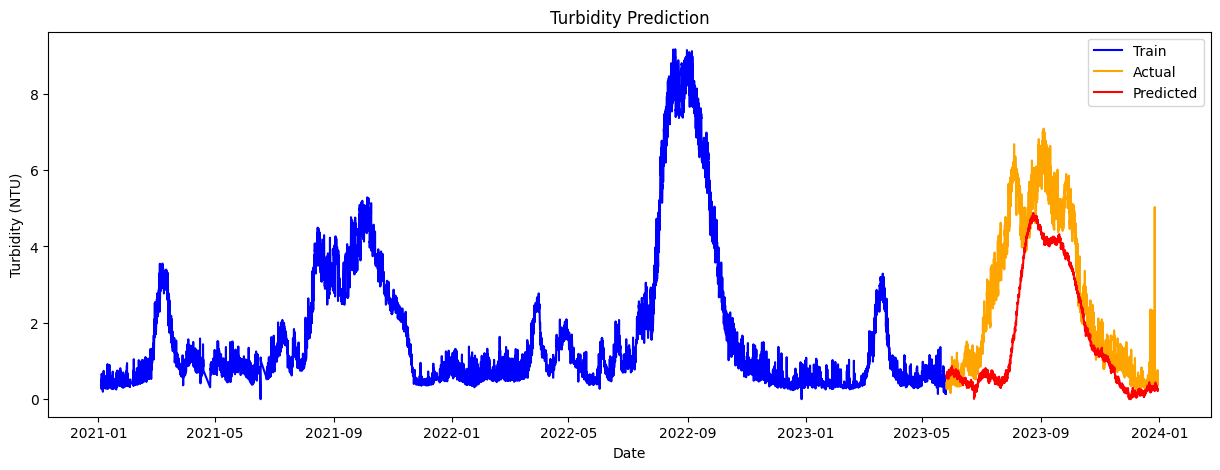

In [77]:
# plot train and test data + predictions
plt.figure(figsize=(15, 5))
plt.plot(train['ds'], train['y'], label='Train', color='blue')
plt.plot(test['ds'], test['y'], label='Actual', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.title('Turbidity Prediction')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()
